In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

# Implementing the Armijo rule

In [2]:
def armijo(f, gradf, x, d, gamma=0.001, beta=0.5):
    '''f is a function and gradf its gradient, x a point in the domain of f, d is a descent direction, and beta and gamma
    are parameters of the Armijo algorithm
    '''
    sigma = 1
    
    while f(x + sigma * d) - f(x) > sigma * gamma * gradf(x)@d:
        sigma = beta * sigma

    return sigma

In [3]:
f = lambda x: (x[0]-1)**2 + (x[1]-1)**2 + 1
gradf = lambda x: np.array([2 * (x[0]-1), 2 * (x[1]-1)])

# Using -gradf(x) as descent direction
armijo(f, gradf, np.array([0,-1]), np.array([2,4]))

0.5

# Implementing the steepest descent 

In [4]:
def steepestdesc(f, gradf, x_0, e = 10**(-3), maxit = 10000):
    '''returns the iterates of the steepest descent algorithm applied on f 
    e is a tolerance parameter and maxit is the maximum number of iterations.
    '''
    x = x_0
    iterates =  [x]
    n_iter = 0
    while n_iter < maxit and np.sqrt(gradf(x)@gradf(x)) > e:
        ## We get first the step size using the Armijo rule with minus gradient as descent direction
        sigma = armijo(f, gradf, x, -gradf(x))
        x = x - sigma * gradf(x)
        iterates.append(x)
        n_iter+=1
    return np.array(iterates)

In [5]:
f = lambda x: 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
gradf = lambda x: np.array([ - 400 * x[0] * (x[1]-x[0]**2) - 2 * (1-x[0]), 200 * (x[1]-x[0]**2)])

steepestdesc(f, gradf, np.array([1,-0.5]) )

array([[ 1.        , -0.5       ],
       [-1.34375   ,  0.671875  ],
       [ 1.05507469,  1.55764771],
       ...,
       [ 1.00077317,  1.00154827],
       [ 1.00077119,  1.00154775],
       [ 1.00077191,  1.00154589]])

# Testing the implementations

## Rosenbrock function

Text(0, 0.5, '$x_2$')

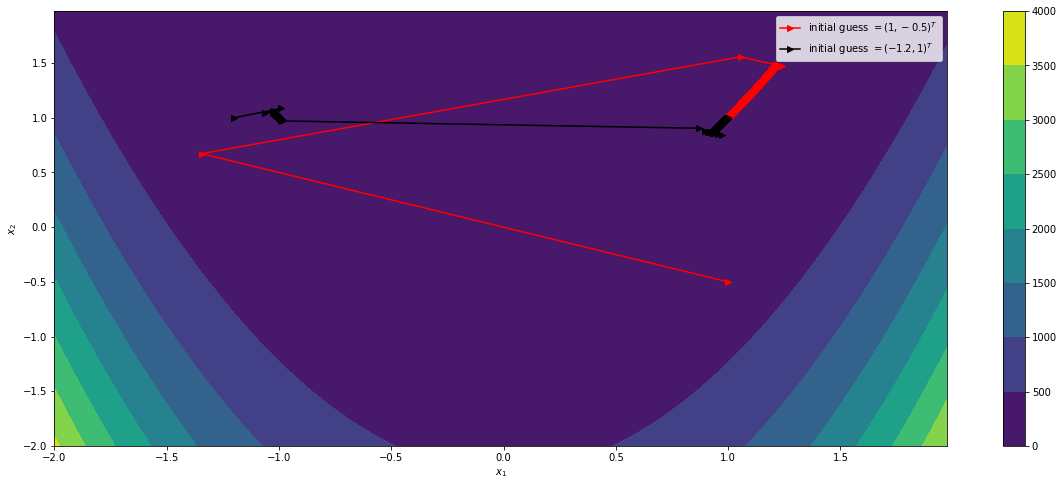

In [6]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(111)


min_x1 = -2
max_x1 = 2
min_x2 = -2
max_x2 = 2
step_x1 = 0.025
step_x2 = 0.025

x1 = np.arange(min_x1, max_x1, step_x1)
x2 = np.arange(min_x2, max_x2, step_x2)
x1, x2 = np.meshgrid(x1, x2)
f_x = 100 * (x2 - x1**2)**2 + (1 - x1)**2

# 2D plot
two_d_plot = ax1.contourf(x1, x2, f_x, cmap=cm.viridis )
cbar = fig.colorbar(two_d_plot)

# Representing the iterates
L1 = steepestdesc(f, gradf, np.array([1,-0.5]))
ax1.plot(L1[0:,0], L1[0:,1], color='red', marker ='>', label = "initial guess $=(1,-0.5)^T$")

L2 = steepestdesc(f, gradf, np.array([-1.2,1]))
ax1.plot(L2[0:,0], L2[0:,1], color='black', marker ='>', label = "initial guess $=(-1.2,1)^T$")

ax1.legend()

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")

## Case $f(x) = \frac{2}{3}x^3 + \frac{1}{2}x^2$

### Theoretical extrema

$f$ is twice differentiable and since for all $x\in \mathbb{R}$ we have $f'(x) = 2x^2 + x$ and $f''(x) = 4x+1$, the stationary points are $0$ (local minimum since $f''(0) = 1>0$) and $-\frac{1}{2}$ (local maximum since $f''(-\frac{1}{2}) = -1<0$)

Text(0, 0.5, '$f(x)$')

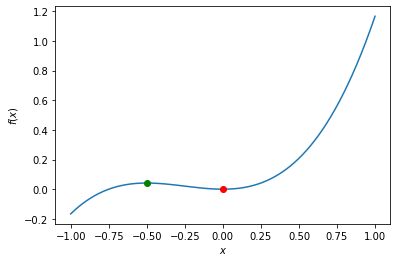

In [7]:
f = lambda x: (2*x**3)/3 + (x**2)/2

X = np.linspace(-1,1,1000)
plt.plot(X,f(X))
plt.plot([0],[f(0)], marker= 'o', color='red' )
plt.plot([-1/2], [f(-1/2)], marker = 'o', color = 'green')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

### Testing the implemention

In [8]:
gradf = lambda x: np.array([2*x**2 + x])

In [18]:
def steepestdesc2(f, gradf, x_0, e = 10**(-3), maxit = 10000):
    '''returns at most the 5 first iterates, the value of f at the iterates, the descent direction and the step size at each iteration,
     using the steepest descent algorithm applied on f 
    e is a tolerance parameter and maxit is the maximum number of iterations.
    '''
    x = x_0
    iterates =  np.array([]) 
    step_sizes = np.array([])
    search_dir = np.array([])
    n_iter = 0
    while n_iter < maxit and np.sqrt(gradf(x)@gradf(x)) >= e:
        ## We get first the step size using the Armijo rule with minus gradient as descent direction
        sigma = armijo(f, gradf, x, -gradf(x))
        
        x = x - sigma * gradf(x)
        iterates = np.append(iterates, x)
        step_sizes=np.append(step_sizes, [sigma])
        search_dir=np.append(search_dir, -gradf(x))
        n_iter+=1
        
    return pd.DataFrame({"iterate": iterates[:5],"function value":  f(np.array(iterates)[:5]), \
                         "search direction": search_dir[:5], "step size": step_sizes[:5]})

### initial guess $x_0 = 1$

In [19]:
steepestdesc2(f, gradf, np.array([1]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in power
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in square
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in add
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in matmul
  import sys


,iterate,function value,search direction,step size
0,-2.000000e+00,-3.333333e+00,-6.000000e+00,1.0
1,-8.000000e+00,-3.093333e+02,-1.200000e+02,1.0
2,-1.280000e+02,-1.389909e+06,-3.264000e+04,1.0
3,-3.276800e+04,-2.345571e+13,-2.147451e+09,1.0
4,-1.073758e+09,-8.253311e+26,-2.305913e+18,0.5


### initial guess $x_0=0.5$

In [20]:
steepestdesc2(f, gradf, np.array([0.5]))

,iterate,function value,search direction,step size
0,-0.5,0.041667,-0.0,1.0


### initial guess $x_0=0.1 $

In [21]:
steepestdesc2(f, gradf, np.array([0.1]))

,iterate,function value,search direction,step size
0,-0.0200,1.946667e-04,0.019200,1.0
1,-0.0008,3.196587e-07,0.000799,1.0


When the initial guess  is relatively too far from the local extrema, then the steepest descent algorithm may diverge (case $x_0 = 1$), but when it is not far from the local extrema (cases $x_0 = 0.5$ and $x_0 = 0.1$) the algorithm may converge. In this example the result is sensitive to the initial guess.

So in general, we need some assumptions about the objective function so that the steepest descent algorithm converges  with any starting point.